In [225]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [267]:
df1 = pd.read_csv("16p_mbti.csv")
df2 = pd.read_csv("fav.csv")

In [268]:
df=pd.merge(df2, df1, on ='user_id', how='left')

In [135]:
#pd.DataFrame(df['user_mbti'].value_counts())
#df.fillna({'user_statuses_count': 0})

In [218]:
target = pd.DataFrame(df.iloc[:,13].fillna(0))
boston = df.iloc[:,3:5]

In [219]:
#target=target.rename(columns={'retweet_count':0})
#boston=boston.replace([np.inf, -np.inf], 0)
#boston=boston.replace([np.inf, -np.inf], 0)
boston=boston.fillna({'count_EI': 0, 'count_NS': 0, 'count_TF': 0, 'count_JP': 0})

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import statsmodels
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import *

#重回帰モデルの作成
def stats_regress(df_x, df_y):
    model = sm.OLS(df_y, sm.add_constant(df_x))
    result = model.fit()
    print(result.summary())

    return model

#VIF(分散拡大係数)を計算する
def show_vif(model):
    num_cols = model.exog.shape[1]
    vifs = [variance_inflation_factor(model.exog, i) for i in range(num_cols)]
    pdv = pd.DataFrame(vifs, index=model.exog_names, columns=["VIF"])
    print(pdv)

if __name__ == '__main__':
    #dset = datasets.load_boston()
    #boston = pd.DataFrame(dset.data)
    #boston.columns = dset.feature_names
    #target = pd.DataFrame(dset.target)
    model = stats_regress(boston, target)
    show_vif(model)

                            OLS Regression Results                            
Dep. Variable:          retweet_count   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     7368.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:21:22   Log-Likelihood:            -2.1858e+06
No. Observations:              190464   AIC:                         4.372e+06
Df Residuals:                  190461   BIC:                         4.372e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6109.8479     70.124     87.129      0.0

In [230]:
df[df['ratio_EI']>0.2]

,Unnamed: 0_x,count_EI,count_JP,count_NS,count_TF,count_fav_user,created_at_ja,favorite_count,id,ratio_EI,...,user_followee_count,user_follower_count,user_mbti,user_screen_name,user_statuses_count,user_tweet_created_at_day,user_tweet_created_at_hour,user_tweet_created_at_month,user_tweet_created_at_year,user_tweet_created_at_ym
0,0,954.0,1310.0,3230.0,1334.0,4613.0,2.018112e+13,1027929.0,1.066120e+18,0.206807,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,901.0,1242.0,3151.0,1181.0,4439.0,2.018120e+13,507057.0,1.068803e+18,0.202974,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,859.0,1162.0,2716.0,1201.0,3932.0,2.018112e+13,363598.0,1.064068e+18,0.218464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,824.0,1202.0,2843.0,1162.0,3929.0,2.018093e+13,639445.0,1.045495e+18,0.209723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,875.0,1066.0,2538.0,1068.0,3728.0,2.018111e+13,630357.0,1.061222e+18,0.234710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,10,714.0,1010.0,2421.0,931.0,3374.0,2.018113e+13,320420.0,1.067767e+18,0.211618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,12,653.0,900.0,2312.0,984.0,3212.0,2.018112e+13,261622.0,1.066105e+18,0.203300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,14,725.0,838.0,2244.0,1051.0,3198.0,2.018112e+13,343921.0,1.063630e+18,0.226704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,15,649.0,947.0,2244.0,954.0,3193.0,2.018092e+13,442433.0,1.044210e+18,0.203257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,19,572.0,730.0,2130.0,856.0,2840.0,2.018120e+13,173271.0,1.069222e+18,0.201408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [287]:
len_sentence_array = np.array([len(v) for v in list(df[df['ratio_NS']>0.7]['description'].dropna())])

In [288]:
def show_len_str_dist(len_str_array):
    print('長さの平均', len_str_array.mean())
    print('長さの分散', len_str_array.var())
    print('長さの標準偏差', len_str_array.std())

    plt.rcParams['font.family'] = 'IPAexGothic'
    plt.figure()
    plt.title('文字数')
    plt.xlabel('長さ')
    plt.ylabel('頻度')
    plt.hist(len_str_array, color='blue', bins=40)
    plt.show()

長さの平均 80.38866160140269
長さの分散 1777.0722034103255
長さの標準偏差 42.1553342224958


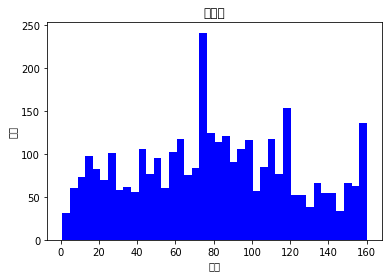

In [289]:
show_len_str_dist(len_sentence_array)

長さの平均 88.54089709762533
長さの分散 2196.408749590994
長さの標準偏差 46.865859104373556


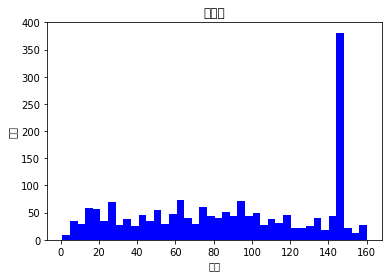

In [286]:
len_sentence_array = np.array([len(v) for v in list(df[df['ratio_NS']<0.7]['description'].dropna())])
show_len_str_dist(len_sentence_array)